In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
#from pandas_profiling import ProfileReport
#from pydantic_settings import BaseSettings
#from ydata_profiling import ProfileReport

In [41]:
# Loading dataset

df = pd.read_csv('socialsentiment.csv', encoding='latin-1')

In [42]:
# During initial loading of dataset there weren't any column names
# Column names are now added

df.columns = ['target', 'ids', 'date', 'user', 'text']
print(df.head())

   target         ids                       date           user  \
0       0  1467810672  2009-04-06 22:19:49-07:00  scotthamilton   
1       0  1467810917  2009-04-06 22:19:53-07:00       mattycus   
2       0  1467811184  2009-04-06 22:19:57-07:00        ElleCTF   
3       0  1467811193  2009-04-06 22:19:57-07:00         Karoli   
4       0  1467811372  2009-04-06 22:20:00-07:00       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [43]:
df.head()

,target,ids,date,user,text
0,0,1467810672,2009-04-06 22:19:49-07:00,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,2009-04-06 22:19:53-07:00,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,2009-04-06 22:19:57-07:00,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,2009-04-06 22:19:57-07:00,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,2009-04-06 22:20:00-07:00,joy_wolf,@Kwesidei not the whole crew


In [44]:
# Data Inspection below
df.tail()

,target,ids,date,user,text
1599994,4,2193601966,2009-06-16 08:40:49-07:00,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,2009-06-16 08:40:49-07:00,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,2009-06-16 08:40:49-07:00,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,2009-06-16 08:40:49-07:00,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,2009-06-16 08:40:50-07:00,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# Dealing with timezones

#### The code below will first remove the timezone and convert it to datetime. We then localize the timezone to 'America/Los_Angeles' for PDT.

```python
df['date'] = df['date'].str.replace(r'PDT', '', regex=True).str.strip()

df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y')

df['date'] = df['date'].dt.tz_localize('America/Los_Angeles')

print(df.head())
```


In [46]:
#profile = ProfileReport(df)
#profile

In [47]:
df.to_csv('socialsentiment.csv', index=False, encoding='latin-1')

In [48]:
print(df.columns)

Index(['target', 'ids', 'date', 'user', 'text'], dtype='object')


In [49]:
df.describe(include='all')

,target,ids,date,user,text
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999
unique,NaN,NaN,774362,659775,1581465
top,NaN,NaN,2009-06-15 12:53:14-07:00,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN


In [50]:
# Data cleaning 
# No data is missing from this dataset

df.isnull().sum()

target    0
ids       0
date      0
user      0
text      0
dtype: int64

In [51]:
list(df.columns)

['target', 'ids', 'date', 'user', 'text']

In [52]:
df.dtypes

target     int64
ids        int64
date      object
user      object
text      object
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   user    1599999 non-null  object
 4   text    1599999 non-null  object
dtypes: int64(2), object(3)
memory usage: 61.0+ MB


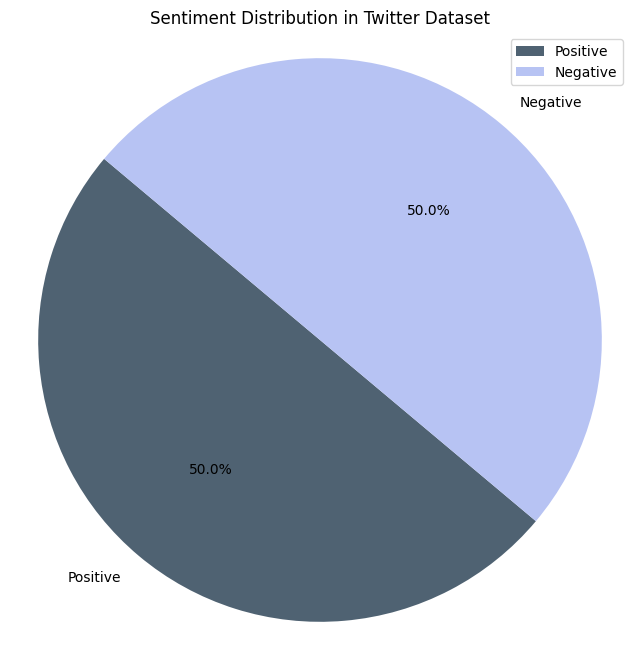

In [54]:
# Create pie chart

# Maps the numeric values to their corresponding sentiment labels

sentiment_mapping = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
df['sentiment_label'] = df['target'].map(sentiment_mapping)

sentiment_counts = df['sentiment_label'].value_counts()
colors = ['#4F6272', '#B7C3F3']

plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors = colors, startangle=140);
plt.title('Sentiment Distribution in Twitter Dataset')
plt.axis('equal')
plt.legend()
plt.show();

In [55]:
# Checking the number of neutral tweets

neutral_tweet_count = df[df['target'] == 2].shape[0]
print(f'Number of neutral tweets: {neutral_tweet_count}')

Number of neutral tweets: 0


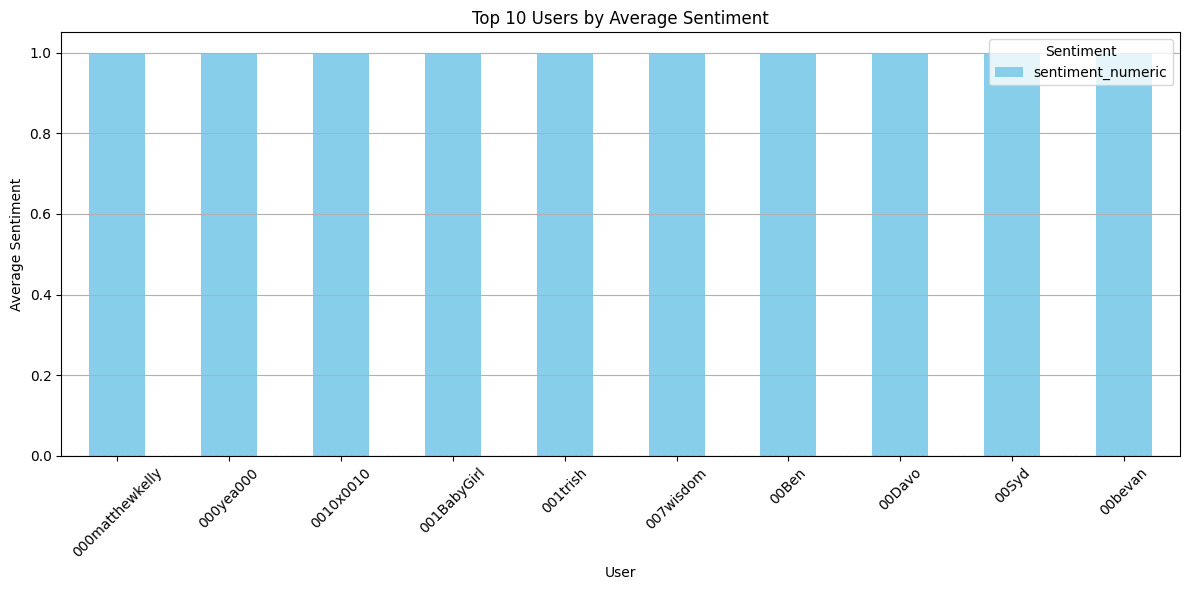

In [56]:
# Creating bar chart
# This chart displays the Top 10 users with the highest average sentiment.

sentiment_numeric = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['sentiment_numeric'] = df['sentiment_label'].map(sentiment_numeric)

user_sentiment = df.groupby('user')['sentiment_numeric'].mean()

top_users = user_sentiment.nlargest(10)

plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Average Sentiment')
plt.xlabel('User')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

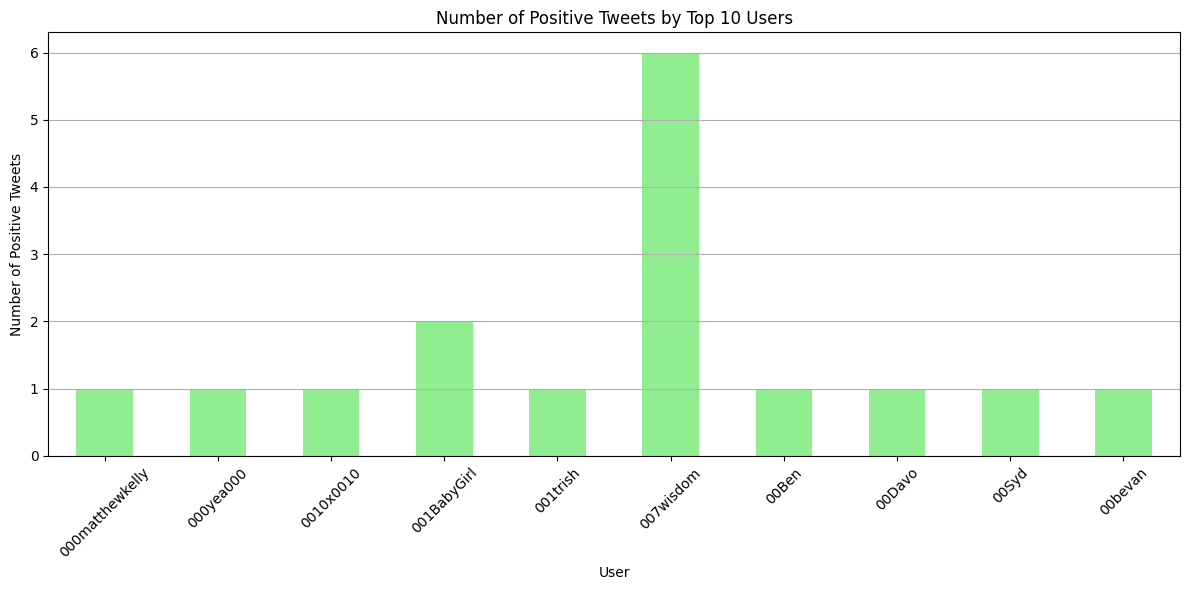

In [57]:
#Positive Engagement Analysis

top_users = user_sentiment.nlargest(10).index

top_user_tweets = df[df['user'].isin(top_users)]

#Count positive tweets for each user

positive_tweet_counts = top_user_tweets[top_user_tweets['sentiment_label'] == 'Positive'].groupby('user').size()

# Bar chart for Positive Engagement

plt.figure(figsize=(12, 6))
positive_tweet_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Positive Tweets by Top 10 Users')
plt.xlabel('User')
plt.ylabel('Number of Positive Tweets')
plt.xticks(rotation=45)
#plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

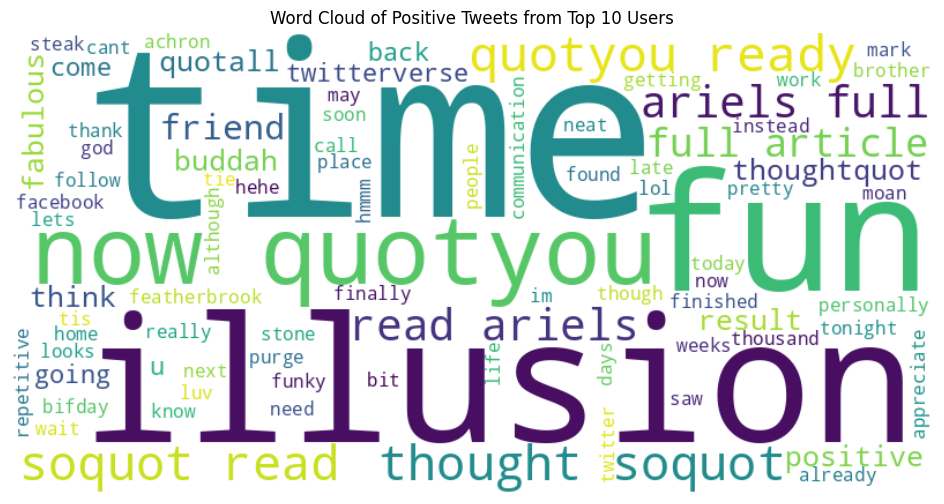

In [58]:
# Content Analysis

# Extract positive tweets
positive_tweets_text = top_user_tweets[top_user_tweets['sentiment_label'] == 'Positive']['text']

# Clean and preprocess the tweet text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert to lowercase

cleaned_tweets = positive_tweets_text.apply(clean_text)

# Combine all cleaned tweets into a single string
all_positive_tweets = ' '.join(cleaned_tweets)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_tweets)

# Step 12: Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Positive Tweets from Top 10 Users')
plt.show()